<b>Import Libraries</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<b>Read the dataset</b>

In [3]:
test = pd.read_csv('/Users/parasmistry/Downloads/Titanic Classification Problem/titanic/test.csv')
train = pd.read_csv('/Users/parasmistry/Downloads/Titanic Classification Problem/titanic/train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
y = train.Survived
test_id = test.PassengerId

<b>Get the count of survived</b>

0    549
1    342
Name: Survived, dtype: int64

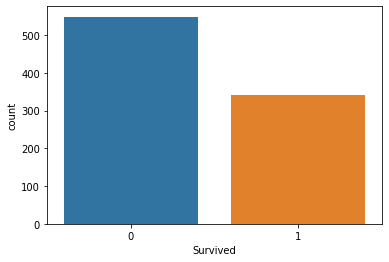

In [11]:
sns.countplot(data = train, x = 'Survived')
y.value_counts()

<b>Plotting the heatmap</b>

<AxesSubplot:>

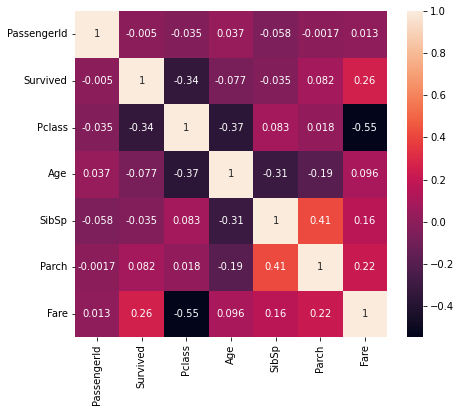

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
cor = train.corr()
sns.heatmap(cor, annot = True)

<b>Getting the subplots</b>

<AxesSubplot:xlabel='Parch', ylabel='count'>

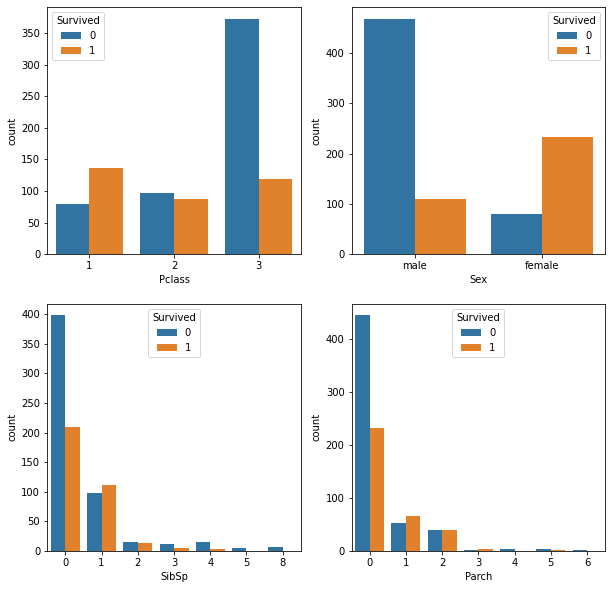

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax1, ax2, ax3, ax4 = ax.flatten()
sns.countplot(data = train, x = 'Pclass', hue = 'Survived', ax = ax1)
sns.countplot(data = train, x = 'Sex', hue = 'Survived', ax = ax2)
sns.countplot(data = train, x = 'SibSp', hue = 'Survived', ax = ax3)
sns.countplot(data = train, x = 'Parch', hue = 'Survived', ax = ax4)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

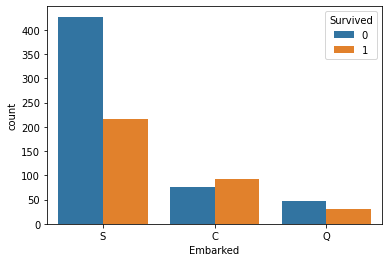

In [14]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

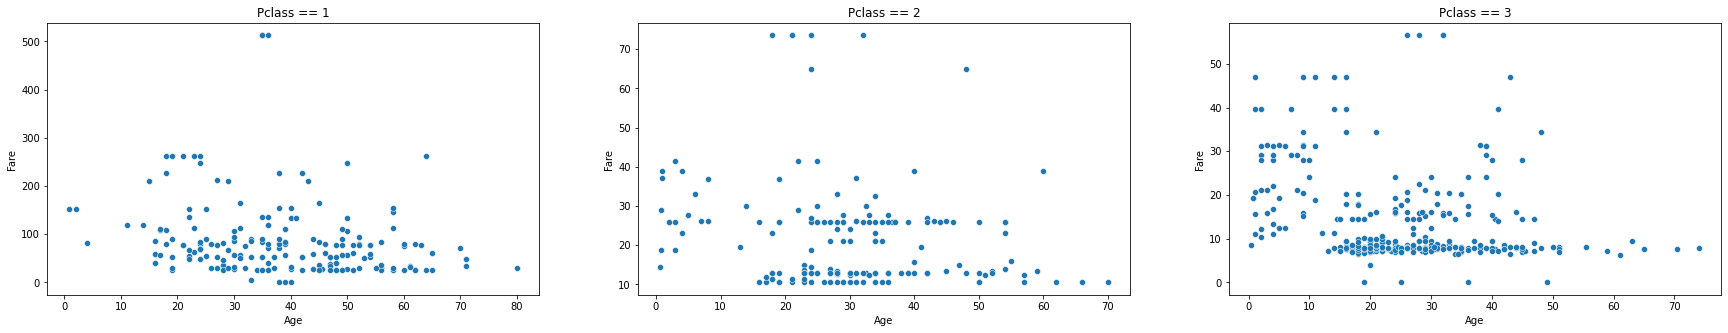

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax1, ax2, ax3 = ax.flatten()
sns.scatterplot(x = train.loc[train['Pclass']==1,'Age'], y = train.loc[train['Pclass']==1,'Fare'], ax = ax1)
sns.scatterplot(x = train.loc[train['Pclass']==2,'Age'], y = train.loc[train['Pclass']==2,'Fare'], ax = ax2)
sns.scatterplot(x = train.loc[train['Pclass']==3,'Age'], y = train.loc[train['Pclass']==3,'Fare'], ax = ax3)
ax1.title.set_text('Pclass == 1')
ax2.title.set_text('Pclass == 2')
ax3.title.set_text('Pclass == 3')

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
df = pd.concat([train, test], sort=False, ignore_index=False)

In [19]:
df.drop(['PassengerId', 'Survived'], axis=1, inplace=True)

In [20]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
df['age_missing'] = 0
df.loc[df['Age'].isnull(),'age_missing'] = 1

In [22]:
df.loc[df['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_missing
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [23]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

In [24]:
train.groupby(['Pclass', 'Embarked', 'Sex'])['Fare'].median()

Pclass  Embarked  Sex   
1       C         female    83.1583
                  male      61.6792
        Q         female    90.0000
                  male      90.0000
        S         female    79.6500
                  male      35.0000
2       C         female    24.0000
                  male      25.8604
        Q         female    12.3500
                  male      12.3500
        S         female    23.0000
                  male      13.0000
3       C         female    14.4583
                  male       7.2292
        Q         female     7.7500
                  male       7.7500
        S         female    14.4500
                  male       8.0500
Name: Fare, dtype: float64

In [25]:
df.loc[df['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_missing
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [26]:
df.loc[df['Ticket']=='3701']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_missing
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [27]:
df.Fare.fillna(8.0500, inplace=True)

In [28]:
df['Surname'] = df.Name.str.split(',', expand=True)[0]

In [29]:
df['fare_above_400'] = 0
df.loc[df['Fare'] > 400,'fare_above_400'] = 1

In [30]:
df['Age_Estimated'] = 0
df.loc[(df['Age']>1)&(df.Age.apply(str).str.split('.', expand=True)[1] == '5'),'Age_Estimated'] = 1

In [31]:
df['New_Born'] = 0
df.loc[df['Age']<= 1,'New_Born'] = 1

In [32]:
df['Cabin'] = df.Cabin.str[:1]
df.loc[(df['Cabin']=='G') | (df['Cabin']=='T'),'Cabin'] = 'Others'
df.Cabin.fillna('Missing', inplace=True)
df.Cabin.value_counts()

Missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
Others        6
Name: Cabin, dtype: int64

In [33]:
df['With_SibSp'] = 0
df.loc[df['SibSp']>= 1,'With_SibSp'] = 1

df['With_Parch'] = 0
df.loc[df['Parch']>= 1,'With_Parch'] = 1

df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [34]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_missing,Surname,fare_above_400,Age_Estimated,New_Born,With_SibSp,With_Parch,Family_Size
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,0,Braund,0,0,0,1,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,Cumings,0,0,0,1,0,2
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,0,Heikkinen,0,0,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,Futrelle,0,0,0,1,0,2
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,0,Allen,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,Missing,S,1,Spector,0,0,0,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,0,Oliva y Ocana,0,0,0,0,0,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Missing,S,0,Saether,0,1,0,0,0,1
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,Missing,S,1,Ware,0,0,0,0,0,1


In [35]:
df.isnull().sum()

Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            0
age_missing         0
Surname             0
fare_above_400      0
Age_Estimated       0
New_Born            0
With_SibSp          0
With_Parch          0
Family_Size         0
dtype: int64

In [36]:
for sex in ['female', 'male']:
    for pclass in [1, 2, 3]:
        for with_sibsp in [0, 1]:
            for with_parch in [0, 1]:
                df.loc[(df['Age'].isnull())&(df['Sex'] == sex)&(df['Pclass'] == pclass)&(df['With_SibSp'] == with_sibsp)&(df['With_Parch'] == with_parch), 'Age'] =  round(df.groupby(['Sex', 'Pclass','With_SibSp','With_Parch']).get_group((sex,pclass, with_sibsp, with_parch))["Age"].median(),1)
df.isnull().sum()

Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
age_missing       0
Surname           0
fare_above_400    0
Age_Estimated     0
New_Born          0
With_SibSp        0
With_Parch        0
Family_Size       0
dtype: int64

In [37]:
df = pd.get_dummies(data = df, drop_first = True, columns = ['Pclass', 'Sex', 'Embarked', 'Cabin'])

In [38]:
df.drop(labels =['Name', 'Ticket', 'Surname'], inplace=True, axis = 'columns')

In [39]:
df

,Age,SibSp,Parch,Fare,age_missing,fare_above_400,Age_Estimated,New_Born,With_SibSp,With_Parch,...,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_Missing,Cabin_Others
0,22.0,1,0,7.2500,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,35.0,1,0,53.1000,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,35.0,0,0,8.0500,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,26.0,0,0,8.0500,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
414,39.0,0,0,108.9000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
415,38.5,0,0,7.2500,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
416,26.0,0,0,8.0500,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [40]:
# split train set from test set
X = df[:len(y)]
test = df[len(y):]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y , train_size=0.8, random_state=0, shuffle=True)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_valid = scaler.transform(X_valid)  

X_scaler = StandardScaler()
X_scaler.fit(X)  
X = X_scaler.transform(X)  
test = X_scaler.transform(test)  

<b>Logistic Regression</b>

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', penalty = 'l1')
logreg.fit(X_train, y_train)
preds = logreg.predict(X_valid)

cm = confusion_matrix(y_valid, preds)

TN, FP, FN, TP = confusion_matrix(y_valid, preds).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  51
False Positive(FP) =  14
True Negative(TN)  =  96
False Negative(FN) =  18


In [44]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.821


<b>Random Forest</b>

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
preds = RF.predict(X_valid)

cm = confusion_matrix(y_valid, preds)

TN, FP, FN, TP = confusion_matrix(y_valid, preds).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  33
False Positive(FP) =  3
True Negative(TN)  =  107
False Negative(FN) =  36


In [46]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.782


<b>Support Vector Machine</b>

In [47]:
from sklearn import svm

SVM = svm.LinearSVC(max_iter = 10000)
SVM.fit(X_train, y_train)
preds = SVM.predict(X_valid)

cm = confusion_matrix(y_valid, preds)

TN, FP, FN, TP = confusion_matrix(y_valid, preds).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  50
False Positive(FP) =  14
True Negative(TN)  =  96
False Negative(FN) =  19


In [48]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.816


<b>Neural Network</b>

In [50]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=0, max_iter = 10000)

NN.fit(X_train, y_train)
preds = NN.predict(X_valid)

cm = confusion_matrix(y_valid, preds)

TN, FP, FN, TP = confusion_matrix(y_valid, preds).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  51
False Positive(FP) =  14
True Negative(TN)  =  96
False Negative(FN) =  18


In [51]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.821


In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


kf = StratifiedKFold(n_splits=5,random_state=0, shuffle=True)
# pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X[train_index],X[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    #model
#     lr = LogisticRegression(multi_class='ovr', solver = 'liblinear', penalty = 'l1')
#     lr = LogisticRegression(multi_class='ovr')
    lr = LogisticRegression(multi_class='ovr', solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.2, max_iter = 10000)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
#     pred_test = lr.predict_proba(x_test)[:,1]
#     pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.822266139657444
2 of KFold 5
ROC AUC score: 0.8351604278074866
3 of KFold 5
ROC AUC score: 0.8085561497326204
4 of KFold 5
ROC AUC score: 0.7518716577540108
5 of KFold 5
ROC AUC score: 0.7725036564286664


In [53]:
from statistics import mean, stdev
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('CV\n',cv_score,'\nMean:',mean(cv_score),'\nStD:',stdev(cv_score))
print(mean(cv_score) - stdev(cv_score),'-',mean(cv_score) + stdev(cv_score))

Confusion matrix
 [[91 18]
 [20 49]]
CV
 [0.822266139657444, 0.8351604278074866, 0.8085561497326204, 0.7518716577540108, 0.7725036564286664] 
Mean: 0.7980716062760456 
StD: 0.03485339683038173
0.7632182094456639 - 0.8329250031064273


In [54]:
lr.score(xvl,yvl)

0.7865168539325843

<b>Making predictions on the test set</b>

In [55]:
test_preds = lr.predict(test)

sub = pd.DataFrame()
sub['PassengerId'] = test_id
sub['Survived'] = test_preds
sub.to_csv('submission.csv',index=False)